# Klasifikasi Dataset Dry Bean Menggunakan Decision Tree Classifier

Petunjuk Penggunaan:
1. Pada Menu Bar Jupyter, tekan menu Run.
2. Tekan sub menu Run All Cells.

#### Mengimpor Library Awal

In [82]:
# Mengimpor library Numpy
import numpy as np
# Mengimpor Library Pandas
import pandas as pd

#### Memasukkan Dataset

In [83]:
# Membaca file dan disimpan di df (DataFrame)
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
# Menampilkan df
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#### Mengakses Data yang Diperlukan

In [84]:
# Mencetak isi kolom Class
df['Class']

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [85]:
# Mencetak informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [86]:
# Mencetak nilai unik pada kolom Class
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [87]:
# Mencetak kolom Class dataset secara unik
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [88]:
# Menampilkan jumlah setiap nilai pada kolom Class
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

#### Melakukan Data Pre-Processing

In [89]:
# Mengimpor library untuk data pre-processing
from sklearn.preprocessing import LabelEncoder
# Mengubah nilai dalam kolom 'Class' menjadi bilangan bulat
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

In [90]:
# Pembagian feature (X) dan target (y)
X = df.iloc[:,0:16]
y = df.iloc[:,16:]

#### Splitting Dataset

In [91]:
# Mengimpor library untuk splitting dataset
from sklearn.model_selection import train_test_split
# Pembagian dataset menjadi data training sebesar 80% dan data testing sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#### Melakukan Data Pre-Processing

In [92]:
# Mengimpor library untuk data pre-processing
from sklearn.preprocessing import StandardScaler
# Melakukan penskalaan standar pada data_train dan data_test
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

#### Klasifikasi Decision Tree

In [93]:
# Mengimpor library Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Memasukkan objek klasifikasi Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')


 Accuracy score untuk set testing :
  0.8982739625413148


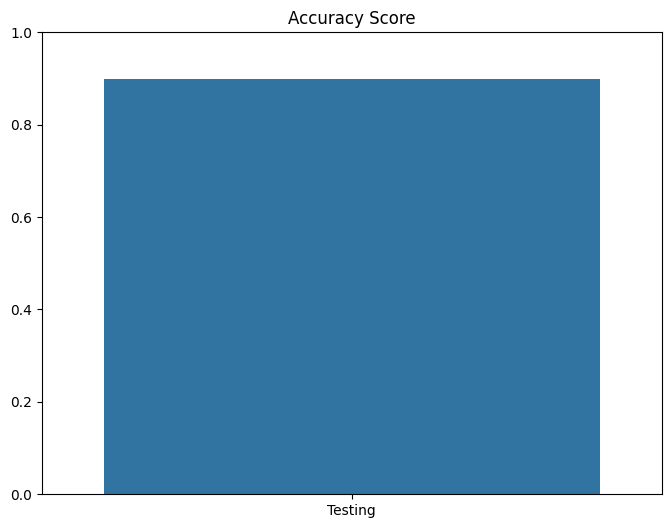


 Confusion matrix untuk set testing :
 [[230   0  17   0   3   2   9]
 [  0 117   0   0   0   0   0]
 [ 22   0 284   0  10   0   1]
 [  0   0   0 593   7   8  63]
 [  2   0   6   2 391   0   7]
 [  6   0   0  20   0 376  11]
 [  1   0   3  60   9   8 455]]


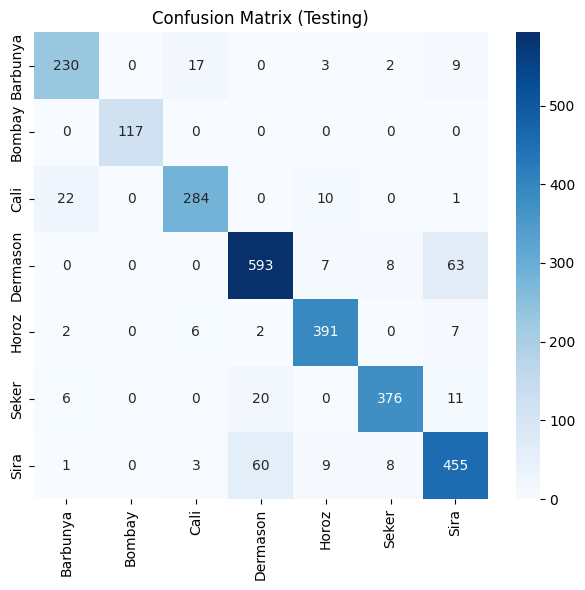


 Classification report untuk set testing :
               precision    recall  f1-score   support

    Barbunya       0.88      0.88      0.88       261
      Bombay       1.00      1.00      1.00       117
        Cali       0.92      0.90      0.91       317
    Dermason       0.88      0.88      0.88       671
       Horoz       0.93      0.96      0.94       408
       Seker       0.95      0.91      0.93       413
        Sira       0.83      0.85      0.84       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



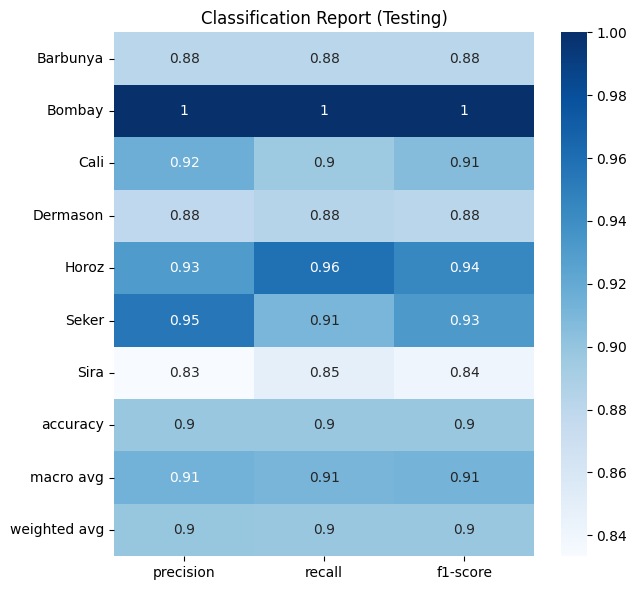

In [94]:
# Mengimpor beberapa library terkait evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor library Matplotlib
import matplotlib.pyplot as plt
# Mengimpor library Seaborn
import seaborn as sns
# Mencetak data testing
testing_predict = clf.predict(X_test)
# Mencetak accuracy score data testing
print ('\n Accuracy score untuk set testing :\n ', accuracy_score(y_test, testing_predict))
# Visualisasi accuracy score
plt.figure(figsize=(8, 6))
sns.barplot(x=['Testing'], y=[accuracy_score(y_test, testing_predict)])
plt.title('Accuracy Score')
plt.ylim(0, 1)
plt.show()

# Mencetak confusion matrix data testing
print ('\n Confusion matrix untuk set testing :\n',confusion_matrix(y_test, testing_predict))
# Visualisasi confusion matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, testing_predict), annot=True, fmt='d', cmap='Blues', xticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], yticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'])
plt.title('Confusion Matrix (Testing)')

plt.tight_layout()
plt.show()

# Mencetak classification report data testing
print ('\n Classification report untuk set testing :\n',classification_report(y_test, testing_predict, target_names=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']))
# Visualisasi classification report
classification_report_testing = classification_report(y_test, testing_predict, target_names=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], output_dict=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame(classification_report_testing).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing)')

plt.tight_layout()
plt.show()

In [95]:
# Mengimpor library Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Memasukkan objek klasifikasi Decision Tree
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_test, y_test)

DecisionTreeClassifier(criterion='entropy')


 Accuracy score untuk set training :
  0.8876745040411462


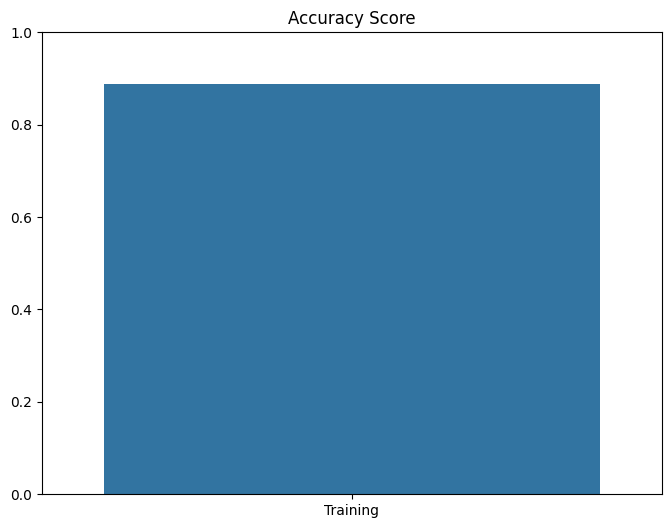


 Confusion matrix untuk set training :
 [[ 915    0   95    0   17   10   24]
 [   0  404    1    0    0    0    0]
 [  73    0 1189    0   37    1   13]
 [   0    0    0 2520   12   67  276]
 [   9    0   26    8 1402    0   75]
 [   6    0    1   41    1 1497   68]
 [  27    0   11  233   41   50 1738]]


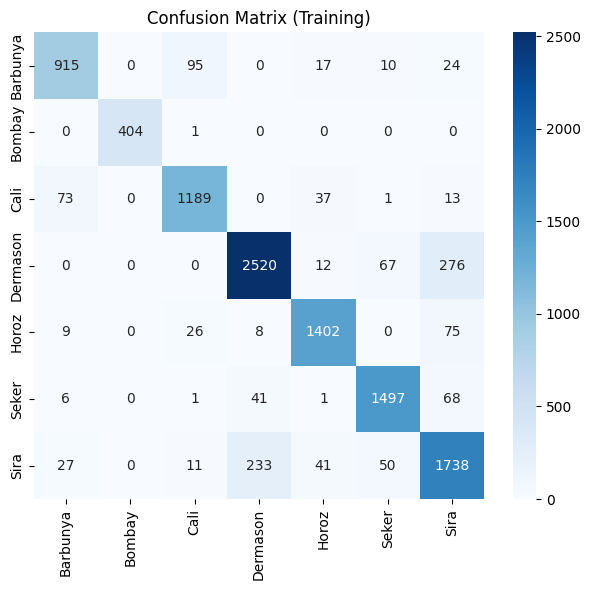


 Classification report untuk set training :
               precision    recall  f1-score   support

    Barbunya       0.89      0.86      0.88      1061
      Bombay       1.00      1.00      1.00       405
        Cali       0.90      0.91      0.90      1313
    Dermason       0.90      0.88      0.89      2875
       Horoz       0.93      0.92      0.93      1520
       Seker       0.92      0.93      0.92      1614
        Sira       0.79      0.83      0.81      2100

    accuracy                           0.89     10888
   macro avg       0.90      0.90      0.90     10888
weighted avg       0.89      0.89      0.89     10888



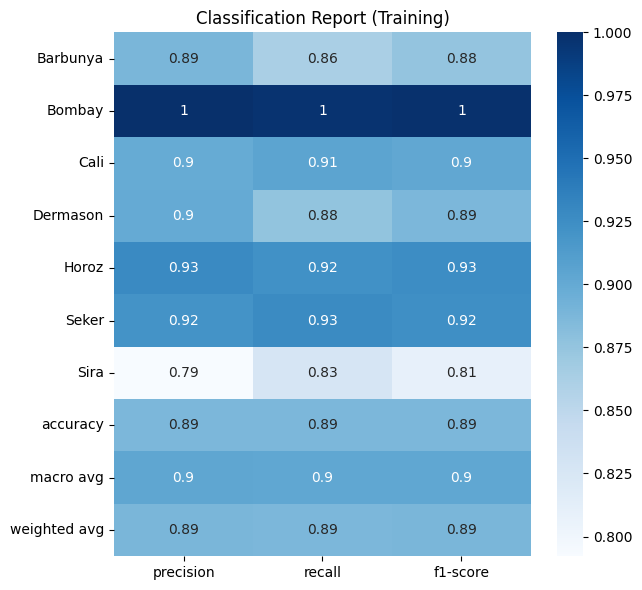

In [96]:
# Mengimpor beberapa library terkait evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor library Matplotlib
import matplotlib.pyplot as plt
# Mengimpor library Seaborn
import seaborn as sns
# Mencetak data training
training_predict = clf2.predict(X_train)
# Mencetak accuracy score data training
print ('\n Accuracy score untuk set training :\n ', accuracy_score(y_train, training_predict))
# Visualisasi accuracy score
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training'], y=[accuracy_score(y_train, training_predict)])
plt.title('Accuracy Score')
plt.ylim(0, 1)
plt.show()

# Mencetak confusion matrix data training
print ('\n Confusion matrix untuk set training :\n',confusion_matrix(y_train, training_predict))
# Visualisasi confusion matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_train, training_predict), annot=True, fmt='d', cmap='Blues', xticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], yticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'])
plt.title('Confusion Matrix (Training)')

plt.tight_layout()
plt.show()

# Mencetak classification report data training
print ('\n Classification report untuk set training :\n',classification_report(y_train, training_predict, target_names=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira']))
# Visualisasi classification report
classification_report_training = classification_report(y_train, training_predict, target_names=['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], output_dict=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(classification_report_training).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training)')

plt.tight_layout()
plt.show()

In [ ]:
# Mengundah library graphviz
!pip install graphviz pydotplus

In [98]:
# Mengimpor library StringIO
from six import StringIO
# Mengimpor library graphviz
from sklearn.tree import export_graphviz
# Mengimpor library pydotplus
import pydotplus
# Mengimpor library IPython Display Image
from IPython.display import Image
# Membuat objek StringIO
dot_data = StringIO()
# Merancang gambaran grafik
export_graphviz(
    clf, 
    out_file = dot_data, 
    feature_names = X.columns, 
    class_names = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], 
    filled = True, 
    rounded = True, 
    special_characters = True, 
    max_depth = 3
)
# Membuat grafik
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Menyimpan grafik dan nama gambarnya
graph.write_png('Dry Bean.png')
# Menampilkan gambar
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# Mengimpor library Matplotlib
import matplotlib.pyplot as plt
# Mengimpor library Seaborn
import seaborn as sns
# Membuat feature importances
feature_importances = clf.feature_importances_
# Membuat DataFrame untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Mengurutkan DataFrame berdasarkan feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Mencetak feature importances
print(feature_importance_df)
# Visualisasi feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()